In [8]:
%load_ext autoreload
%autoreload 2

import pymc4 as pm
import tensorflow as tf
import time
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
from pymc4 import sampling
#reload module
from importlib import reload  
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def collect_time_state(model, progressbar, N=10, ns=1000):
    global sampling
    prog_tm = []
    for i in range(N):
        sampling = reload(sampling)
        time_ = time.time()
        sampling.sample(model(), progressbar=progressbar, num_samples=ns)
        prog_tm.append(time.time() - time_)
    return prog_tm

In [3]:
def plot_graphs(stats, names):
    fig, ax = plt.subplots(figsize=(9,4))
    for i, values in enumerate(stats):
        sns.distplot(values, label=names[i], ax=ax)
    ax.set_xlabel("time,s")
    plt.legend()

## Check on the toy model

In [4]:
@pm.model
def model():
    m = yield pm.Normal("m", 0, 1)
    return m

In [5]:
# test progressbar=False performance
prog_tm = collect_time_state(model, False)
# test progressbar=True performance
nprog_tm = collect_time_state(model, True)

100%|██████████| 1000/1000 [00:09<00:00, 111.03it/s]
W0620 20:01:14.283154 140072671983424 def_function.py:120] 5 out of the last 5 calls to <bound method DualAveragingStepSizeAdaptation.bootstrap_results of <tensorflow_probability.python.mcmc.dual_averaging_step_size_adaptation.DualAveragingStepSizeAdaptation object at 0x7f64705069b0>> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
100%|██████████| 1000/1000 [00:07<0

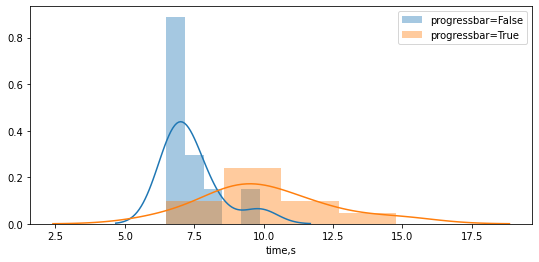

In [6]:
plot_graphs([prog_tm, nprog_tm], ["progressbar=False", "progressbar=True"])

## Check on Eight Schools Model

In [9]:
J = 8
y = np.array([28,  8, -3,  7, -1,  1, 18, 12], dtype=np.float32)
sigma = np.array([15, 10, 16, 11,  9, 11, 10, 18], dtype=np.float32)

In [10]:
@pm.model
def schools_pm4():
    eta = yield pm.Normal("eta", 0, 1, batch_stack=J)
    mu = yield pm.Normal("mu", 0, 1, batch_stack=1)
    tau = yield pm.HalfNormal('tau', 2., batch_stack=1)
    theta = mu + tau * eta
    obs = yield pm.Normal('obs', theta, scale=sigma, observed=y)
    return obs

In [11]:
# test progressbar=False performance
prog_tm = collect_time_state(model, False)
# test progressbar=True performance
nprog_tm = collect_time_state(model, True)

W0620 20:14:19.592368 140072671983424 def_function.py:120] 11 out of the last 11 calls to <bound method DualAveragingStepSizeAdaptation.bootstrap_results of <tensorflow_probability.python.mcmc.dual_averaging_step_size_adaptation.DualAveragingStepSizeAdaptation object at 0x7f6490424048>> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
100%|██████████| 1000/1000 [00:10<00:00, 95.02it/s]
W0620 20:14:31.459166 140072671983

100%|██████████| 1000/1000 [00:09<00:00, 104.45it/s]
W0620 20:16:03.387053 140072671983424 def_function.py:120] 11 out of the last 11 calls to <bound method DualAveragingStepSizeAdaptation.bootstrap_results of <tensorflow_probability.python.mcmc.dual_averaging_step_size_adaptation.DualAveragingStepSizeAdaptation object at 0x7f64702a4828>> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
100%|██████████| 1000/1000 [00:08

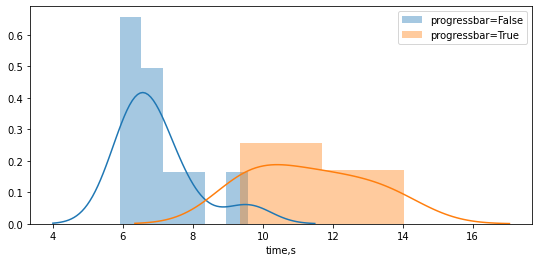

In [12]:
plot_graphs([prog_tm, nprog_tm], ["progressbar=False", "progressbar=True"])

## Check on Eight Schools Model with more samples

In [16]:
# test progressbar=False performance
prog_tm = collect_time_state(model, False, ns=5000)
# test progressbar=True performance
nprog_tm = collect_time_state(model, True, ns=5000)

W0620 20:23:52.063307 140072671983424 def_function.py:120] 11 out of the last 11 calls to <bound method DualAveragingStepSizeAdaptation.bootstrap_results of <tensorflow_probability.python.mcmc.dual_averaging_step_size_adaptation.DualAveragingStepSizeAdaptation object at 0x7f64705be5c0>> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
100%|██████████| 5000/5000 [00:20<00:00, 248.30it/s]
W0620 20:24:12.883037 14007267198

100%|██████████| 5000/5000 [00:18<00:00, 274.84it/s]
W0620 20:26:49.811273 140072671983424 def_function.py:120] 11 out of the last 11 calls to <bound method DualAveragingStepSizeAdaptation.bootstrap_results of <tensorflow_probability.python.mcmc.dual_averaging_step_size_adaptation.DualAveragingStepSizeAdaptation object at 0x7f6490352940>> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
100%|██████████| 5000/5000 [00:20

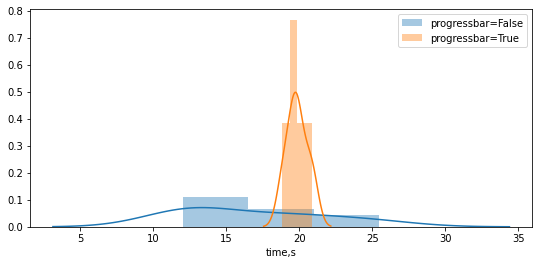

In [17]:
plot_graphs([prog_tm, nprog_tm], ["progressbar=False", "progressbar=True"])